# Design of Digital Filters

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Design of Non-Recursive Filters using the Window Method

The design of non-recursive filters with a finite-length impulse response (FIR) is a frequent task in practical applications. The designed filter should approximate a prescribed frequency response as close as possible. First, the design of causal filters is considered. For many applications the resulting filter should have a linear phase characteristic since this results in a constant (frequency independent) group delay. We therefore specialize the design to causal linear-phase filters in a second step.

### Causal Filters

Let's assume that the desired frequency characteristic of the discrete filter is given by its continuous frequency response $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ in the discrete-time Fourier domain. Its impulse response is given by inverse discrete-time Fourier transform (inverse DTFT) of the frequency response

\begin{equation}
h_\text{d}[k] = \frac{1}{2 \pi} \int\limits_{- \pi}^{\pi} H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \, \mathrm{e}^{\,\mathrm{j}\,\Omega\,k} \; \mathrm{d}\Omega
\end{equation}

In the general case, $h_\text{d}[k]$ will not be a causal FIR. The [Paley-Wiener theorem](https://en.wikipedia.org/wiki/Paley%E2%80%93Wiener_theorem) states, that the transfer function of a causal system may only have zeros at a countable number of single frequencies. This is not the case for idealized filters, like e.g. the [ideal low-pass filter](https://en.wikipedia.org/wiki/Low-pass_filter#Ideal_and_real_filters), were the transfer function is zeros over an interval of frequencies. The basic idea of the window method is to truncate the impulse response $h_\text{d}[k]$ in order to derive a causal FIR filter. This can be achieved by applying a window $w[k]$ of finite length $N$ to $h_\text{d}[k]$

\begin{equation}
h[k] = h_\text{d}[k] \cdot w[k]
\end{equation}

where $h[k]$ denotes the impulse response of the designed filter and $w[k] = 0$ for $k < 0 \land k \geq N$. Its frequency response $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is given by the multiplication theorem of the discrete-time Fourier transform (DTFT)

\begin{equation}
H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{2 \pi} \; H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \circledast W(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{equation}

where $W(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ denotes the DTFT of the window function $w[k]$. The frequency response $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of the filter is given as the periodic convolution of the desired frequency response $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and the frequency response of the window function $W(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. The frequency response $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is equal to the desired frequency response $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ only if $W(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 2 \pi \cdot \delta(\Omega)$. This would require that $w[k] = 1$ for $k = -\infty, \dots, \infty$. Hence for a window $w[k]$ of finite length, deviations from the desired frequency response are to be expected.

In order to investigate the effect of truncation on the frequency response $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$, a particular window is considered. A straightforward choice is the rectangular window $w[k] = \text{rect}_N[k]$ of length $N$. Its DTFT is given as

\begin{equation}
W(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \mathrm{e}^{-\mathrm{j} \, \Omega \,\frac{N-1}{2}} \cdot \frac{\sin(\frac{N \,\Omega}{2})}{\sin(\frac{\Omega}{2})}
\end{equation}

The frequency-domain properties of the rectangular window have already been discussed for the [leakage effect](../spectral_analysis_deterministic_signals/leakage_effect.ipynb). The rectangular window features a narrow main lobe at the cost of relative high sidelobe level. The main lobe gets narrower with increasing length $N$. The convolution of the desired frequency response with the frequency response of the window function effectively results in smoothing and ringing. While the main lobe will smooth discontinuities of the desired transfer function, the sidelobes result in undesirable ringing effects. The latter can be alleviated by using other window functions. Note that typical [window functions](../spectral_analysis_deterministic_signals/window_functions.ipynb) decay towards their ends and are symmetric with respect to their center. This may cause problems for desired impulse responses with large magnitudes towards their ends.

#### Example - Causal approximation of ideal low-pass

The design of an ideal low-pass filter using the window method is illustrated in the following. For $|\Omega| < \pi$ the transfer function of the ideal low-pass is given as

\begin{equation}
H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \begin{cases}
1 & \text{for } |\Omega| \leq \Omega_\text{c} \\
0 & \text{otherwise}
\end{cases}
\end{equation}

where $\Omega_\text{c}$ denotes the cut frequency of the low-pass. An inverse DTFT of the desired transfer function yields

\begin{equation}
h_\text{d}[k] = \frac{\Omega_\text{c}}{\pi} \cdot \text{sinc}(\Omega_\text{c} \, k)
\end{equation}

The impulse response $h_\text{d}[k]$ is not causal nor FIR. In order to derive a causal FIR approximation, a rectangular window $w[k]$ of length $N$ is applied

\begin{equation}
h[k] = h_\text{d}[k] \cdot \text{rect}_N[k]
\end{equation}

The resulting magnitude and phase response is computed numerically in the following.

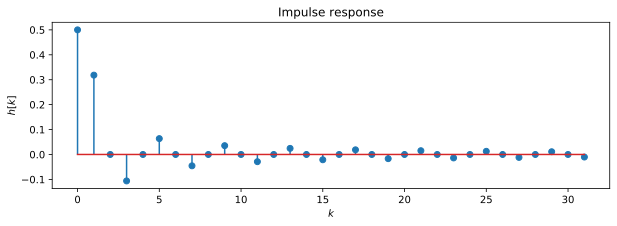

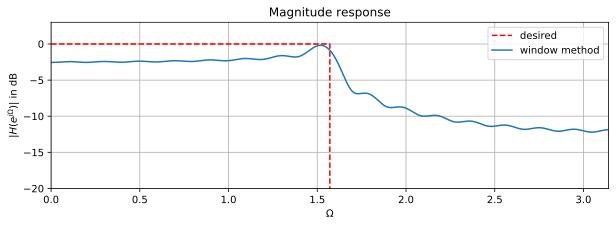

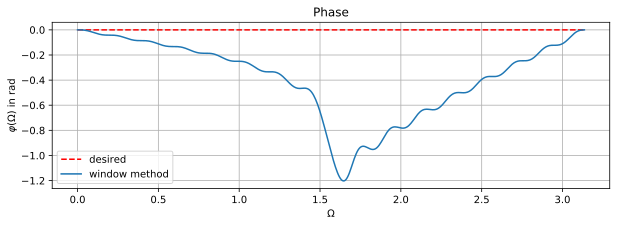

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib inline

N = 32  # length of filter
Omc = np.pi/2

# compute impulse response
k = np.arange(N)
hd = Omc/np.pi * np.sinc(k*Omc/np.pi)
# windowing
w = np.ones(N)
h = hd * w

# frequency response
Om, H = sig.freqz(h)

# plot impulse response
plt.figure(figsize=(10, 3))
plt.stem(h, use_line_collection=True)
plt.title('Impulse response')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
# plot magnitude responses
plt.figure(figsize=(10, 3))
plt.plot([0, Omc, Omc], [0, 0, -100], 'r--', label='desired')
plt.plot(Om, 20 * np.log10(abs(H)), label='window method')
plt.title('Magnitude response')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H(e^{j \Omega})|$ in dB')
plt.axis([0, np.pi, -20, 3])
plt.grid()
plt.legend()
# plot phase responses
plt.figure(figsize=(10, 3))
plt.plot([0, Om[-1]], [0, 0], 'r--', label='desired')
plt.plot(Om, np.unwrap(np.angle(H)), label='window method')
plt.title('Phase')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi (\Omega)$ in rad')
plt.grid()
plt.legend()

**Exercises**

* Does the resulting filter have the desired phase?
* Increase the length `N` of the filter. What changes?

Solution: The desired filter has zero-phase for all frequencies, hence $\varphi_\text{d}(\Omega) = 0$. The phase of the resulting filter is not zero as can be concluded from the lower illustration. The small local variations (ripples) in the magnitude $|H(\mathrm{e}^{\,\mathrm{j}\,\Omega})|$ of the transfer function of the resulting filter decrease with an increasing number `N` of filter coefficients. The achievable attenuation in the stop-band of the low-pass does not change.

### Zero-Phase Filters

Lets assume a general zero-phase filter with transfer function $H_d(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = A(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ with magnitude $A(\mathrm{e}^{\,\mathrm{j}\,\Omega})  \in \mathbb{R}$. Due to the symmetry relations of the DTFT, its impulse response $h_d[k] = \mathcal{F}_*^{-1} \{ H_d(e^{j \Omega} \}$ is conjugate complex symmetric

\begin{equation}
h_d[k] = h_d^*[-k]
\end{equation}

A zero-phase filter of length $N > 1$ is not causal as a consequence. The anti-causal part could simply be removed by windowing with a heaviside signal. However, this will result in large deviations between the desired transfer function and the designed filter. This explains the findings from the previous example, that an ideal-low pass cannot be realized very well by the window method. The reason is that an ideal-low pass has zero-phase, as most of the idealized filters.

The impulse response of a stable system, in the sense of the bounded-input/bounded-output (BIBO) criterion, has to be absolutely summable. Which in general is given when its magnitude decays by tendency with increasing time-index $k$.
This observation motivates to shift the desired impulse response to the center of the window in order to limit the effect of windowing. This can be achieved by replacing the zero-phase with a linear-phase, as is illustrated below.

### Causal Linear-Phase Filters

The design of a non-recursive causal FIR filter with a linear phase is often desired due to its constant group delay. Let's assume a filter with generalized linear phase. For $|\Omega| < \pi$ its transfer function is given as

\begin{equation}
H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = A(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot \mathrm{e}^{-\mathrm{j} \alpha \Omega + \mathrm{j} \beta}
\end{equation}

where $A(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \in \mathbb{R}$ denotes the amplitude of the filter, $\alpha$ the linear slope of the phase and $\beta$ a constant phase offset. Such a system can be decomposed into two cascaded systems: a zero-phase system with transfer function $A(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and an all-pass with phase $\varphi(\Omega) = - \alpha \Omega + \beta$. The linear phase term $- \alpha \Omega$ results in the constant group delay $t_g(\Omega) = \alpha$. 

The impulse response $h[k]$ of a linear-phase system shows a specific symmetry which can be deduced from the symmetry relations of the DTFT for odd/even symmetry of $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ as

\begin{equation}
h[k] = \pm h[N-1-k]
\end{equation}

for $k=0, 1, \dots, N-1$ where $N \in \mathbb{N}$ denotes the length of the (finite) impulse response. The transfer function of a linear phase filter is given by its DTFT

\begin{equation}
H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{k=0}^{N-1} h[k] \, \mathrm{e}^{\,-\mathrm{j}\,\Omega\,k}
\end{equation}

Introducing the symmetry relations of the impulse response $h[k]$ into the DTFT and comparing the result with above definition of a generalized linear phase system reveals four different types of linear-phase systems. These can be discriminated with respect to their phase and magnitude characteristics

| Type | Length $N$ | Impulse Response $h[k]\;$ | Group Delay $\alpha$ in Samples| Constant Phase $\beta$ | Transfer Function $A(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ |
| :---:  | :---: | :---: | :---:| :---: | :---: |
| 1 | odd | $h[k] = h[N-1-k]$ | $\alpha = \frac{N-1}{2} \in \mathbb{N}$ | $\beta = \{0, \pi\}$ | $A(\mathrm{e}^{\,\mathrm{j}\,\Omega})=A(\mathrm{e}^{-\,\mathrm{j}\,\Omega})$, all filter characteristics|
| 2 | even| $h[k] = h[N-1-k]$ | $\alpha = \frac{N-1}{2} \notin \mathbb{N}$ | $\beta = \{0, \pi\}$ | $A(\mathrm{e}^{\,\mathrm{j}\,\Omega})=A(\mathrm{e}^{-\,\mathrm{j}\,\Omega})$, $A(\mathrm{e}^{\,\mathrm{j}\,\pi}) = 0$, only lowpass or bandpass|
| 3 | odd | $h[k] = -h[N-1-k]$ | $\alpha = \frac{N-1}{2} \in \mathbb{N}$ | $\beta = \{ \frac{\pi}{2}, \frac{3 \pi}{2} \}$ | $A(\mathrm{e}^{\,\mathrm{j}\,\Omega})=-A(\mathrm{e}^{-\,\mathrm{j}\,\Omega})$, $A(\mathrm{e}^{\,\mathrm{j}\,0}) = A(\mathrm{e}^{\,\mathrm{j}\,\pi}) =  0$, only bandpass|
| 4 | even | $h[k] = -h[N-1-k]$ | $\alpha = \frac{N-1}{2} \notin \mathbb{N}$ | $\beta = \{ \frac{\pi}{2}, \frac{3 \pi}{2} \}$ | $A(\mathrm{e}^{\,\mathrm{j}\,\Omega})=-A(\mathrm{e}^{-\,\mathrm{j}\,\Omega})$, $A(\mathrm{e}^{\,\mathrm{j}\,0}) = 0$, only highpass or bandpass|

These relations have to be considered in the design of a causal linear phase filter. Depending on the desired magnitude characteristics $A(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ the suitable type is chosen. The odd/even length $N$ of the filter and the phase (or group delay) is chosen accordingly for the design of the filter.

#### Example - Causal linear-phase approximation of ideal low-pass

We aim at the design of a causal linear-phase low-pass using the window technique. According to the previous example, the desired frequency response has an even symmetry $A(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = A(\mathrm{e}^{\,-\mathrm{j}\,\Omega})$ with $A(\mathrm{e}^{\mathrm{j}\,0}) = 1$. This could be realized by a filter of type 1 or 2. We choose type 1 with $\beta = 0$, since the resulting filter exhibits an integer group delay of $t_g(\Omega) = \frac{N-1}{2}$ samples. Consequently the length of the filter $N$ has to be odd. 

The impulse response $h_\text{d}[k]$ is given by the inverse DTFT of $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ incorporating the linear phase

\begin{equation}
h_\text{d}[k] = \frac{\Omega_\text{c}}{\pi} \cdot \text{sinc} \left( \Omega_\text{c} \left(k-\frac{N-1}{2} \right) \right)
\end{equation}

The impulse response fulfills the desired symmetry for $k=0,1, \dots, N-1$. A causal FIR approximation is obtained by applying a window function of length $N$ to the impulse response $h_\text{d}[k]$

\begin{equation}
h[k] = h_\text{d}[k] \cdot w[k]
\end{equation}

Note that the window function $w[k]$ also has to fulfill the desired symmetries.

As already outlined, the chosen window determines the properties of the transfer function $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. The [spectral properties of commonly applied windows](../spectral_analysis_deterministic_signals/window_functions.ipynb) have been discussed previously. The width of the main lobe will generally influence the  smoothing of the desired transfer function $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$, while the sidelobes influence the typical ringing artifacts. This is illustrated in the following.

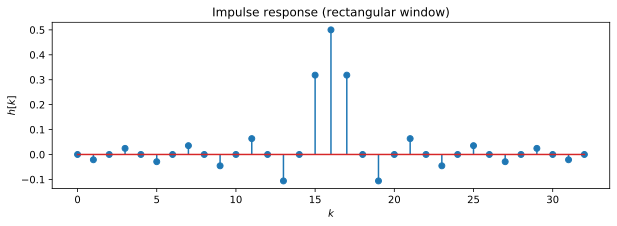

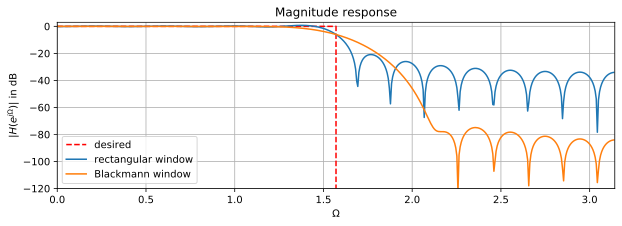

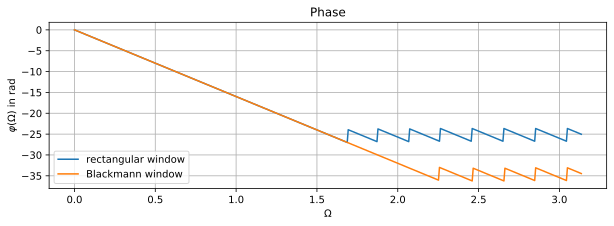

In [3]:
N = 33  # length of filter
Omc = np.pi/2

# compute impulse response
k = np.arange(N)
hd = Omc/np.pi * np.sinc((k-(N-1)/2)*Omc/np.pi)
# windowing
w1 = np.ones(N)
w2 = np.blackman(N)
h1 = hd * w1
h2 = hd * w2

# frequency responses
Om, H1 = sig.freqz(h1)
Om, H2 = sig.freqz(h2)

# plot impulse response
plt.figure(figsize=(10, 3))
plt.stem(h1, use_line_collection=True)
plt.title('Impulse response (rectangular window)')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
# plot magnitude responses
plt.figure(figsize=(10, 3))
plt.plot([0, Omc, Omc], [0, 0, -300], 'r--', label='desired')
plt.plot(Om, 20 * np.log10(abs(H1)), label='rectangular window')
plt.plot(Om, 20 * np.log10(abs(H2)), label='Blackmann window')
plt.title('Magnitude response')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H(e^{j \Omega})|$ in dB')
plt.axis([0, np.pi, -120, 3])
plt.legend(loc=3)
plt.grid()
# plot phase responses
plt.figure(figsize=(10, 3))
plt.plot(Om, np.unwrap(np.angle(H1)), label='rectangular window')
plt.plot(Om, np.unwrap(np.angle(H2)), label='Blackmann window')
plt.title('Phase')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi (\Omega)$ in rad')
plt.legend(loc=3)
plt.grid()

**Exercises**

* Does the impulse response fulfill the required symmetries for a type 1 filter?
* Can you explain the differences between the magnitude responses $|H(\mathrm{e}^{\,\mathrm{j}\,\Omega})|$ for the different window functions?
* What happens if you increase the length `N` of the filter?

Solution: Inspection of the impulse response reveals that it shows the symmetry $h[k] = h[N-1-k]$ of a type 1 filter for odd `N`. The rectangular window features a narrow main lobe at the cost of a high level of the side lobes, the main lobe of the Blackmann window is wider but the level of the side lobes is lower compared to the rectangular window. This explains the behavior of the magnitude responses $|H(\mathrm{e}^{\,\mathrm{j}\,\Omega})|$ in the stop-band of the realized low-passes. The distance between the local minima in the magnitude responses $|H(\mathrm{e}^{\,\mathrm{j}\,\Omega})|$ decreases with increasing length `N` and the attenuation for frequencies towards the Nyquist frequency increases.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.